## Importing Libraries

In [10]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import eda_helper_functions
from sklearn.ensemble import IsolationForest

## Reading the training data

In [3]:
file_path="data/train.csv"
train=pd.read_csv(file_path)
train

,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price
0,Multiple Carriers,2019-03-21,Delhi,Cochin,07:05:00,21:00:00,835,1.0,No Info,13062
1,Vistara,2019-06-03,Chennai,Kolkata,07:05:00,09:20:00,135,0.0,No Info,3687
2,Indigo,2019-06-03,Delhi,Cochin,11:25:00,01:30:00,845,1.0,No Info,5883
3,Jet Airways,2019-06-06,Delhi,Cochin,20:55:00,04:25:00,450,1.0,In-flight meal not included,10262
4,Jet Airways,2019-06-27,Delhi,Cochin,18:20:00,19:00:00,1480,2.0,No Info,14300
...,...,...,...,...,...,...,...,...,...,...
635,Indigo,2019-05-21,Delhi,Cochin,06:50:00,12:10:00,320,1.0,No Info,5530
636,Jet Airways,2019-05-18,Kolkata,Banglore,08:25:00,22:35:00,850,1.0,No Info,14781
637,Indigo,2019-06-06,Kolkata,Banglore,15:15:00,20:30:00,315,1.0,No Info,5170
638,Air India,2019-06-12,Delhi,Cochin,05:10:00,08:00:00,170,0.0,No Info,5201


In [4]:
train.dtypes

airline             object
date_of_journey     object
source              object
destination         object
dep_time            object
arrival_time        object
duration             int64
total_stops        float64
additional_info     object
price                int64
dtype: object

In [5]:
train=train.assign(
    **{
        col: pd.to_datetime(train.loc[:,col],format="mixed")
        for col in ["date_of_journey","dep_time","arrival_time"]
    }
)

train.dtypes

airline                    object
date_of_journey    datetime64[ns]
source                     object
destination                object
dep_time           datetime64[ns]
arrival_time       datetime64[ns]
duration                    int64
total_stops               float64
additional_info            object
price                       int64
dtype: object

## High level summary of the data

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   airline          640 non-null    object        
 1   date_of_journey  640 non-null    datetime64[ns]
 2   source           640 non-null    object        
 3   destination      640 non-null    object        
 4   dep_time         640 non-null    datetime64[ns]
 5   arrival_time     640 non-null    datetime64[ns]
 6   duration         640 non-null    int64         
 7   total_stops      640 non-null    float64       
 8   additional_info  640 non-null    object        
 9   price            640 non-null    int64         
dtypes: datetime64[ns](3), float64(1), int64(2), object(4)
memory usage: 50.1+ KB


In [7]:
train.describe(include='number')

,duration,total_stops,price
count,640.000000,640.000000,640.000000
mean,644.460938,0.821875,8935.921875
std,504.037748,0.649658,4225.910263
min,80.000000,0.000000,1965.000000
25%,175.000000,0.000000,5292.750000
50%,520.000000,1.000000,8073.000000
75%,926.250000,1.000000,12378.500000
max,2565.000000,3.000000,27992.000000


In [8]:
(
    train
    .assign(total_stops=train['total_stops'].astype(object))
    .describe(include="O")
)

,airline,source,destination,total_stops,additional_info
count,640,640,640,640.0,640
unique,8,5,6,4.0,5
top,Jet Airways,Delhi,Cochin,1.0,No Info
freq,224,262,262,359.0,505


### High level analysis of missing data

In [9]:
eda_helper_functions.missing_info(train)

,count,percentage
variable,,


- The output is not visible because there are no missing values in the train dataset 

In [15]:
forest=IsolationForest(n_estimators=10,random_state=7)

In [19]:
(
    train
    .assign(
        outlier=forest.fit_predict(
            train
            .drop(columns="price")
            .select_dtypes(include="number")
        )
    )
    .query("outlier==-1")
    .price
    .describe()
)

count      203.000000
mean      9676.497537
std       4717.752847
min       1965.000000
25%       5548.000000
50%      10203.000000
75%      13067.000000
max      25735.000000
Name: price, dtype: float64

## Pair Plots

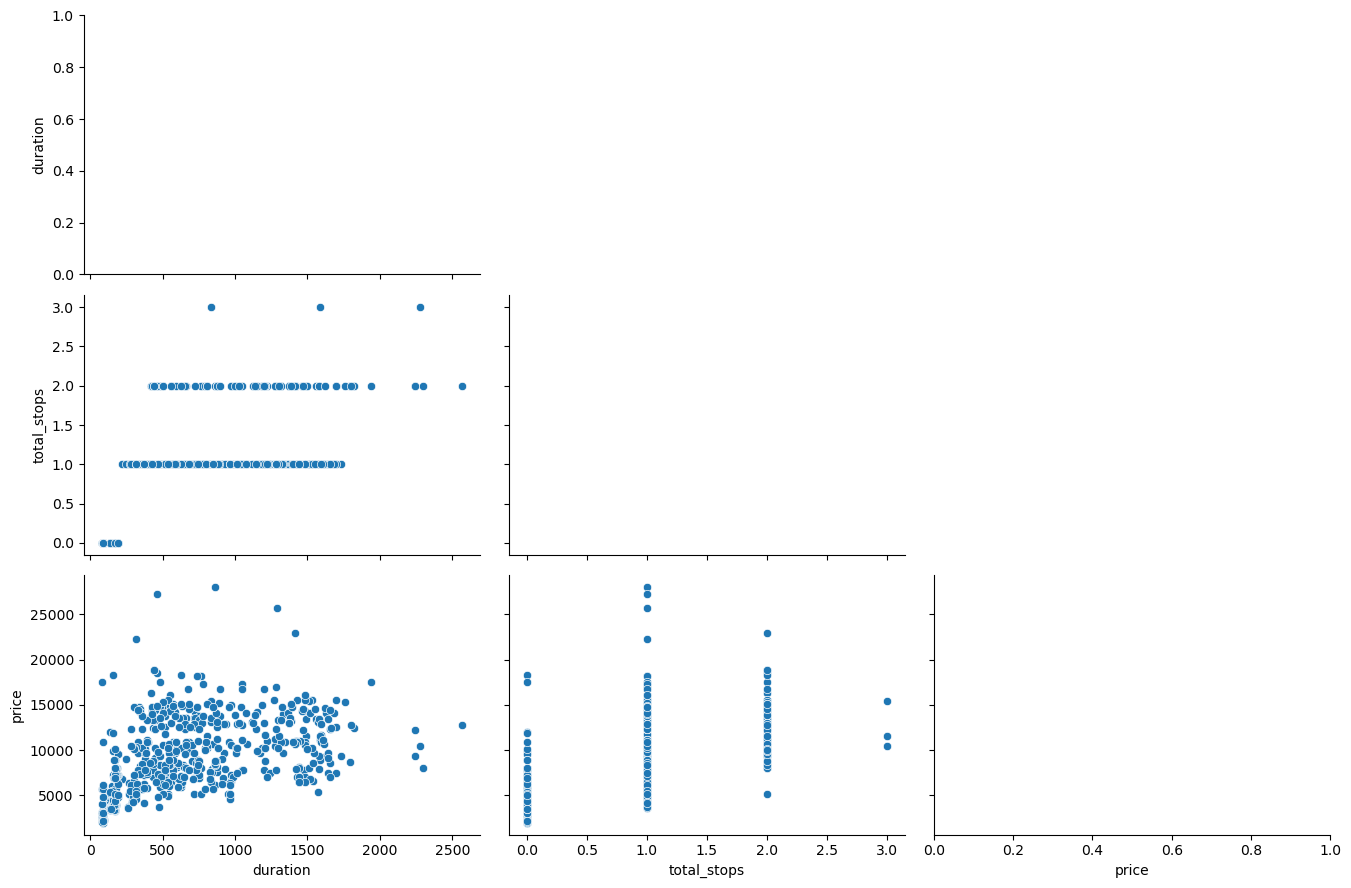

In [20]:
eda_helper_functions.pair_plots(train)

## Correlation Analysis

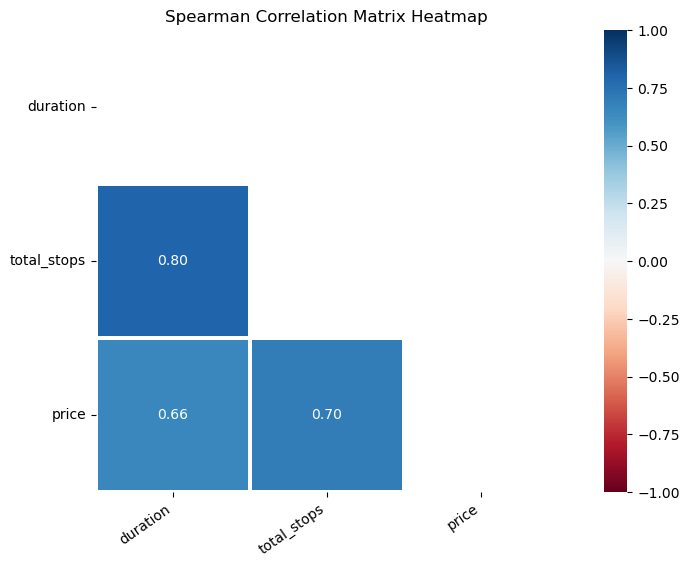

In [21]:
eda_helper_functions.correlation_heatmap(train)

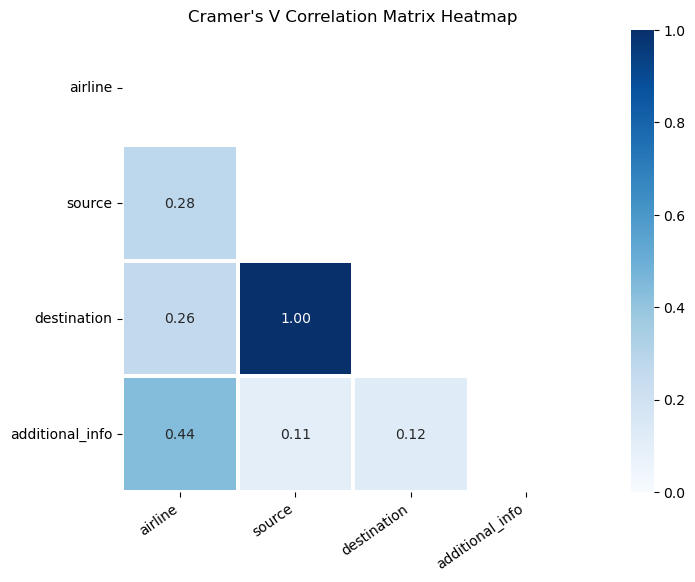

In [22]:
eda_helper_functions.cramersV_heatmap(train)

### Detailed Analysis

In [23]:
train.columns

Index(['airline', 'date_of_journey', 'source', 'destination', 'dep_time',
       'arrival_time', 'duration', 'total_stops', 'additional_info', 'price'],
      dtype='object')

#### Airline

In [24]:
train.airline

0      Multiple Carriers
1                Vistara
2                 Indigo
3            Jet Airways
4            Jet Airways
             ...        
635               Indigo
636          Jet Airways
637               Indigo
638            Air India
639               Indigo
Name: airline, Length: 640, dtype: object

In [25]:
eda_helper_functions.cat_summary(train,"airline")

0      Multiple Carriers
1                Vistara
2                 Indigo
3            Jet Airways
4            Jet Airways
             ...        
635               Indigo
636          Jet Airways
637               Indigo
638            Air India
639               Indigo
Name: airline, Length: 640, dtype: object

Data Type      : object
Cardinality    : 8 categories
Missing Data   : 0 rows (0.00 %)
Available Data : 640 / 640 rows


,
count,640
unique,8
top,Jet Airways
freq,224


,count,percentage
category,,
Jet Airways,224,0.350000
Indigo,132,0.206250
Air India,115,0.179688
Multiple Carriers,78,0.121875
Spicejet,38,0.059375
Vistara,22,0.034375
Air Asia,20,0.031250
Goair,11,0.017188


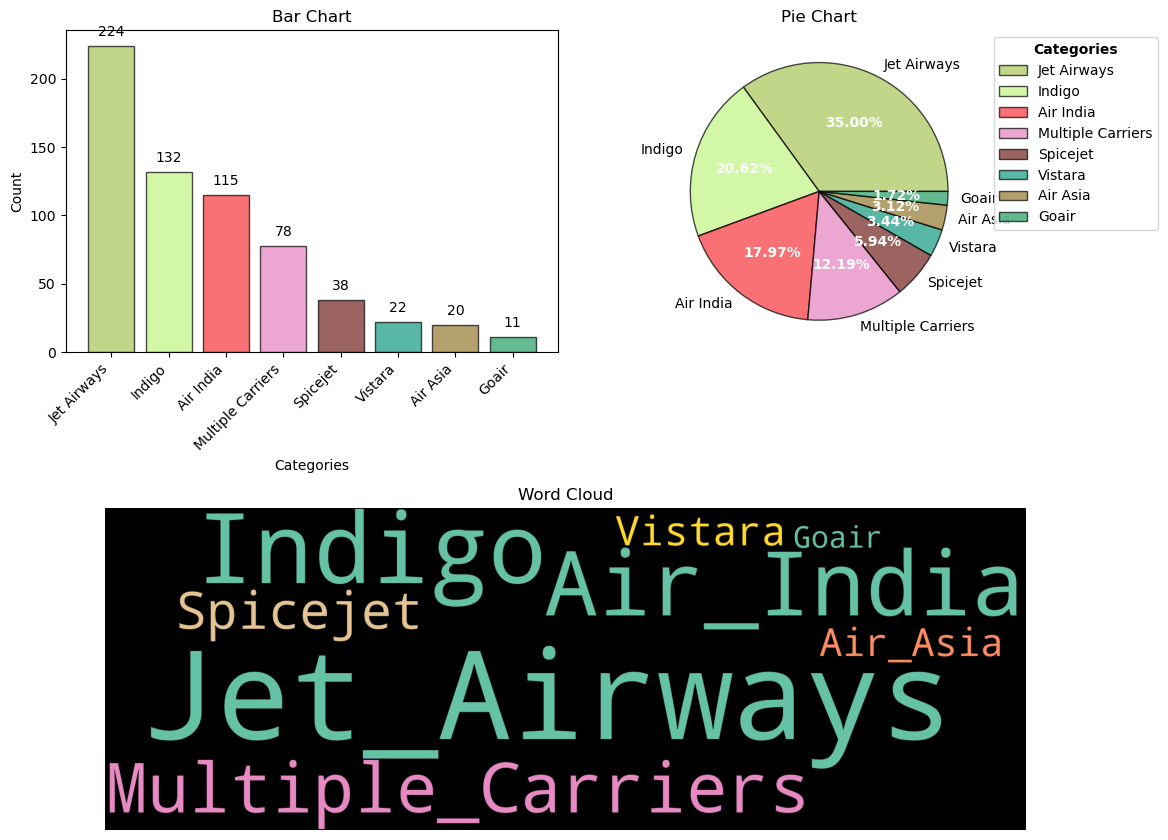

In [28]:
eda_helper_functions.cat_univar_plots(train,"airline")

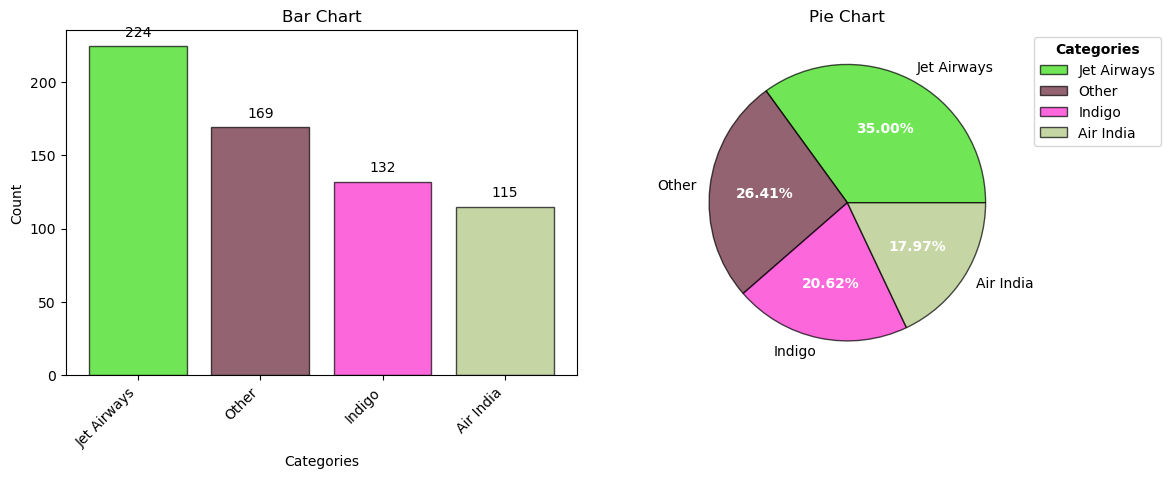

In [30]:
eda_helper_functions.cat_univar_plots(train,"airline",show_wordcloud=False,k=3)

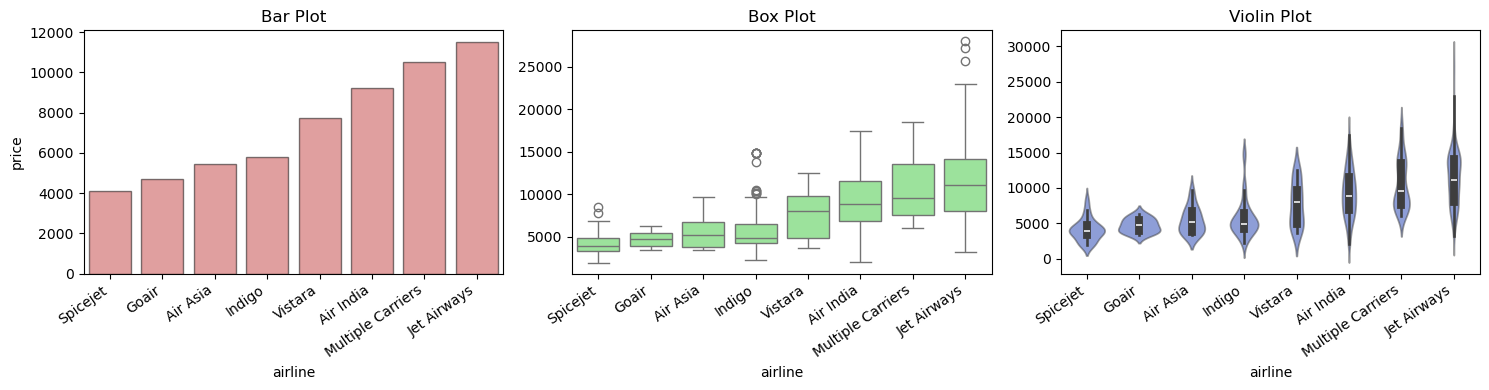

In [31]:
eda_helper_functions.num_cat_bivar_plots(train,num_var="price",cat_var="airline")

In [32]:
eda_helper_functions.num_cat_hyp_testing(train,"price","airline")

- Significance Level   : 5.0%
- Null Hypothesis      : The groups have similar population mean
- Alternate Hypothesis : The groups don't have similar population mean
- Test Statistic       : 55.58281223813729
- p-value              : 7.168110607873313e-62
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price and airline are associated to each other


- Significance Level   : 5.0%
- Null Hypothesis      : The groups have similar population median
- Alternate Hypothesis : The groups don't have similar population median
- Test Statistic       : 282.13489795063134
- p-value              : 3.934468012816268e-57
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price and airline are associated to each other


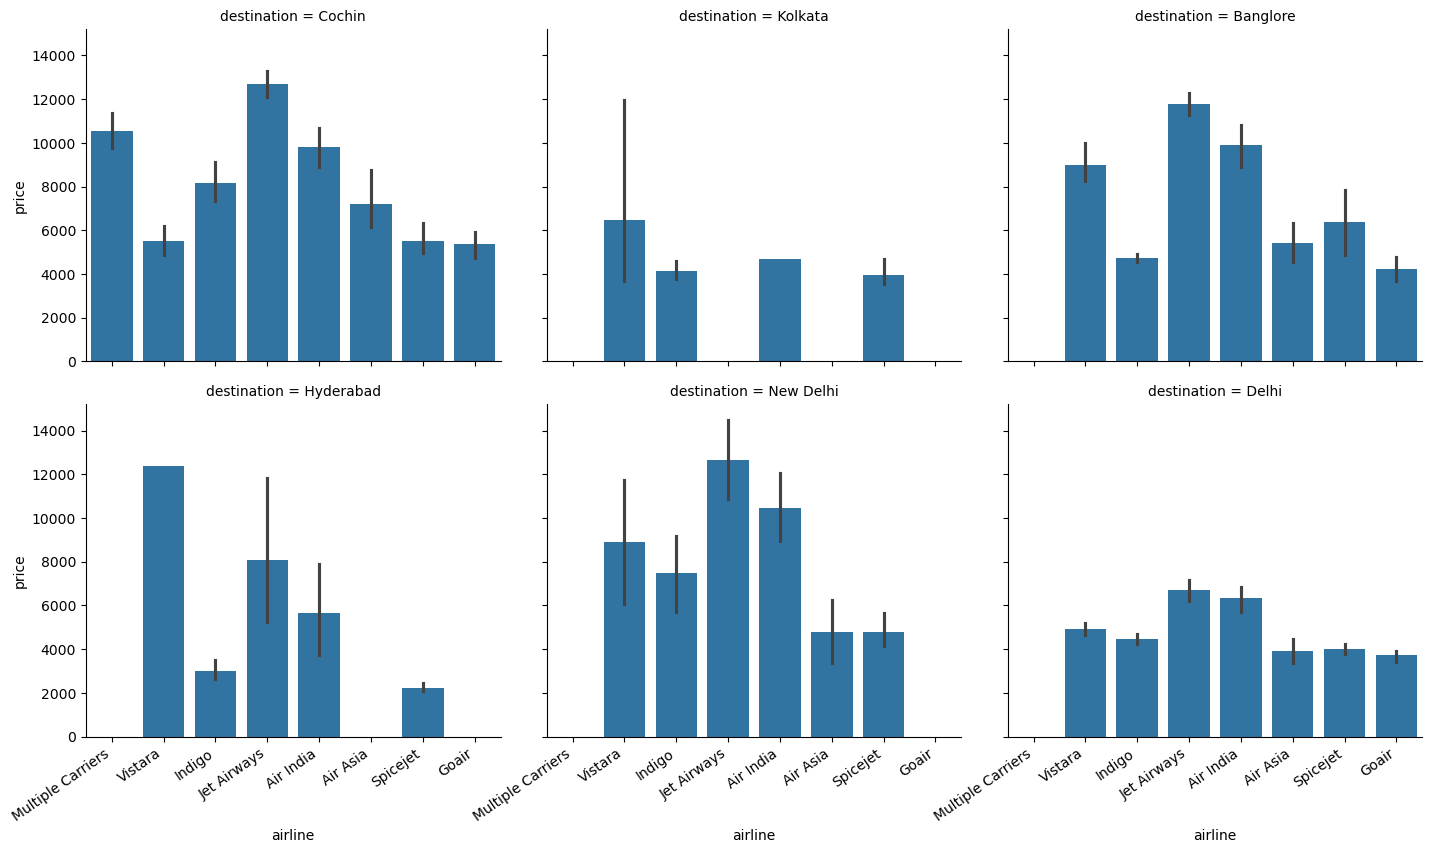

In [36]:
airline_grid=sns.FacetGrid(
    data=train,
    col="destination",
    col_wrap=3,
    height=4,
    aspect=1.2,
    sharey=True
)
airline_grid.map(sns.barplot,"airline","price",order=train.airline.unique())

for ax in airline_grid.axes[3:]:
    eda_helper_functions.rotate_xlabels(ax)

#### Date of journey

In [37]:
train.date_of_journey

0     2019-03-21
1     2019-06-03
2     2019-06-03
3     2019-06-06
4     2019-06-27
         ...    
635   2019-05-21
636   2019-05-18
637   2019-06-06
638   2019-06-12
639   2019-05-12
Name: date_of_journey, Length: 640, dtype: datetime64[ns]

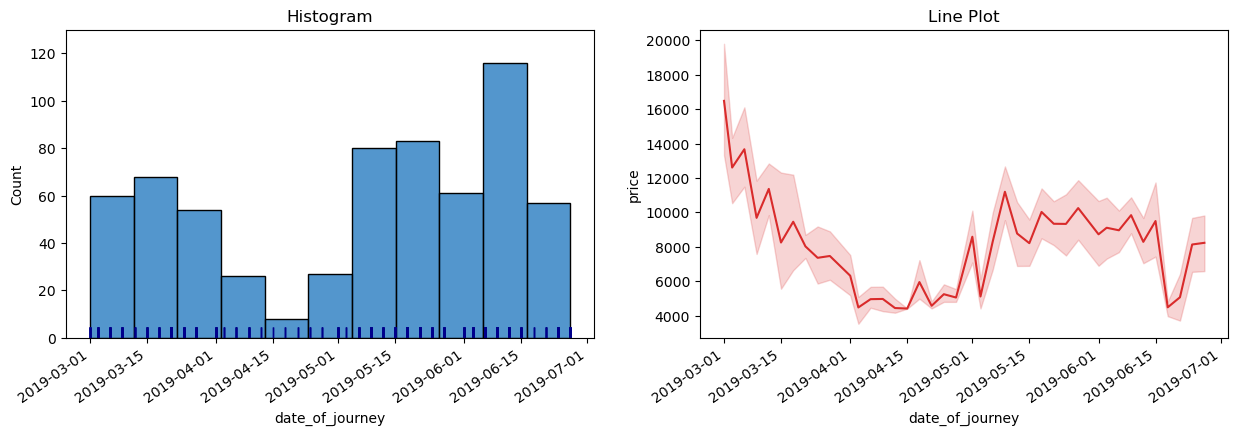

In [38]:
eda_helper_functions.dt_univar_plots(train,"date_of_journey","price")

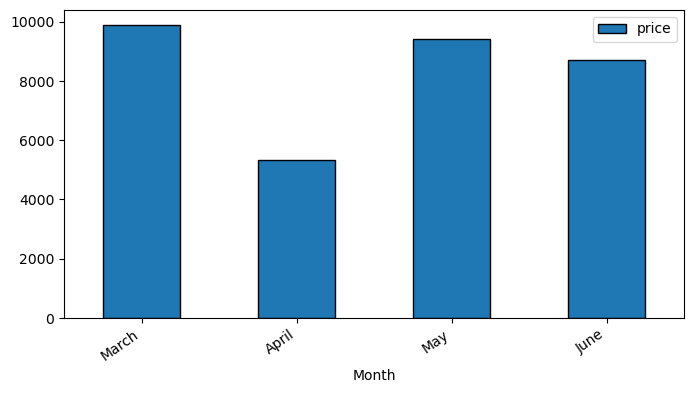

In [46]:
(
    train
    .groupby(pd.Grouper(key='date_of_journey',freq="M"))
    .price.mean()
    .to_frame()
    .set_axis(["March","April","May","June"],axis=0)
    .rename_axis(index="Month")
    .plot(
        kind="bar",
        figsize=(8,4),
        edgecolor="black"
    )
)
ax=plt.gca()
eda_helper_functions.rotate_xlabels(ax)

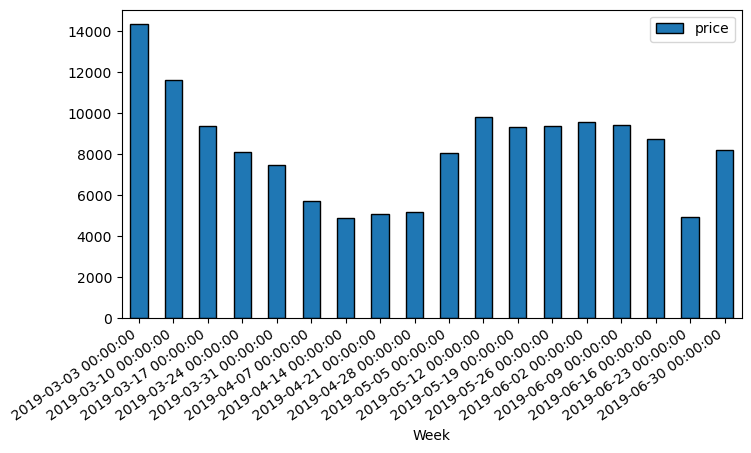

In [47]:
(
    train
    .groupby(pd.Grouper(key='date_of_journey',freq="W"))
    .price.mean()
    .to_frame()
    .rename_axis(index="Week")
    .plot(
        kind="bar",
        figsize=(8,4),
        edgecolor="black"
    )
)
ax=plt.gca()
eda_helper_functions.rotate_xlabels(ax)

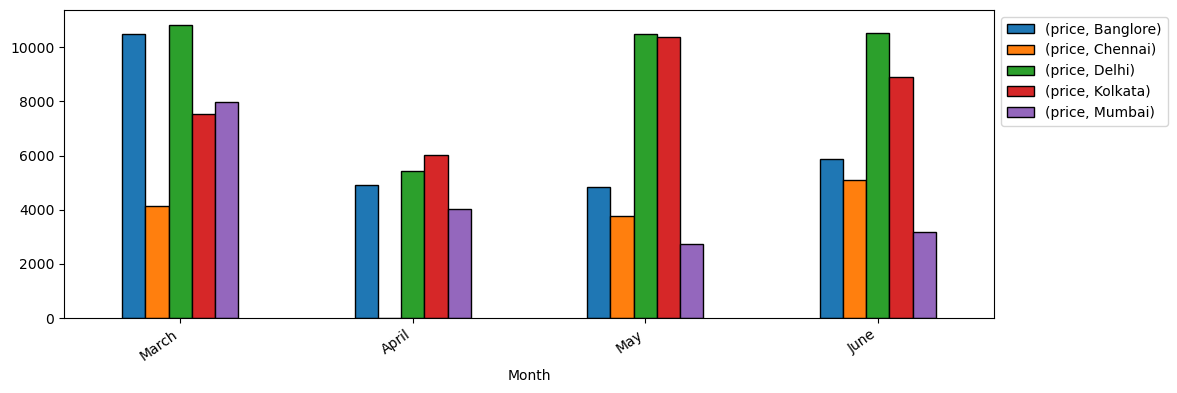

In [62]:
(
    train
    .groupby([pd.Grouper(key="date_of_journey",freq="M"),"source"])
    .price.mean()
    .to_frame()
    .unstack(fill_value=0)
    .set_axis(["March", "April", "May", "June"], axis=0)
    .rename_axis(index="Month")
    .plot(
        kind="bar",
        figsize=(12,4),
        edgecolor="black"
    )
)
ax=plt.gca()
ax.legend(
    loc="upper left",
    bbox_to_anchor=(1,1)
)
eda_helper_functions.rotate_xlabels(ax)

#### Departure time

In [63]:
train.dep_time

0     2024-07-06 07:05:00
1     2024-07-06 07:05:00
2     2024-07-06 11:25:00
3     2024-07-06 20:55:00
4     2024-07-06 18:20:00
              ...        
635   2024-07-06 06:50:00
636   2024-07-06 08:25:00
637   2024-07-06 15:15:00
638   2024-07-06 05:10:00
639   2024-07-06 14:25:00
Name: dep_time, Length: 640, dtype: datetime64[ns]

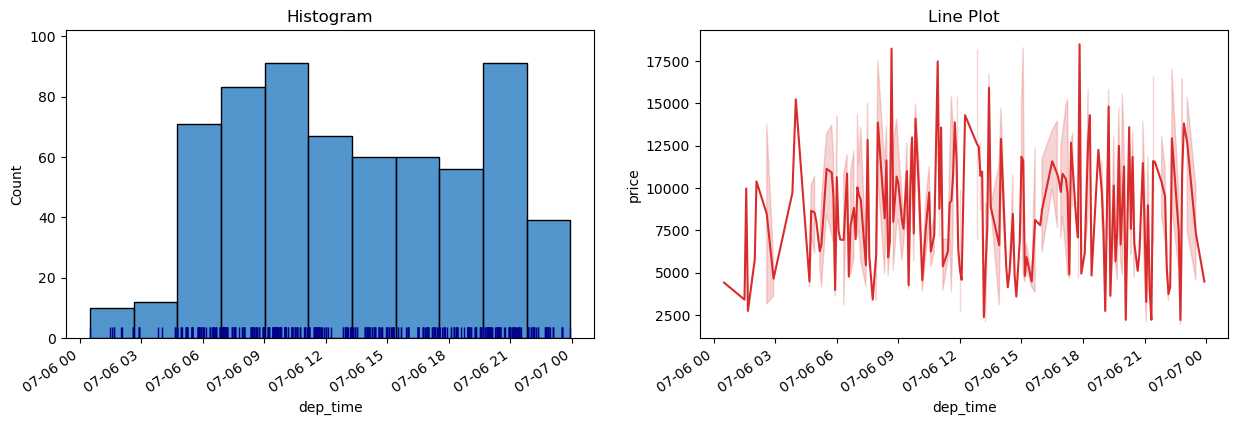

In [65]:
eda_helper_functions.dt_univar_plots(train,"dep_time","price")

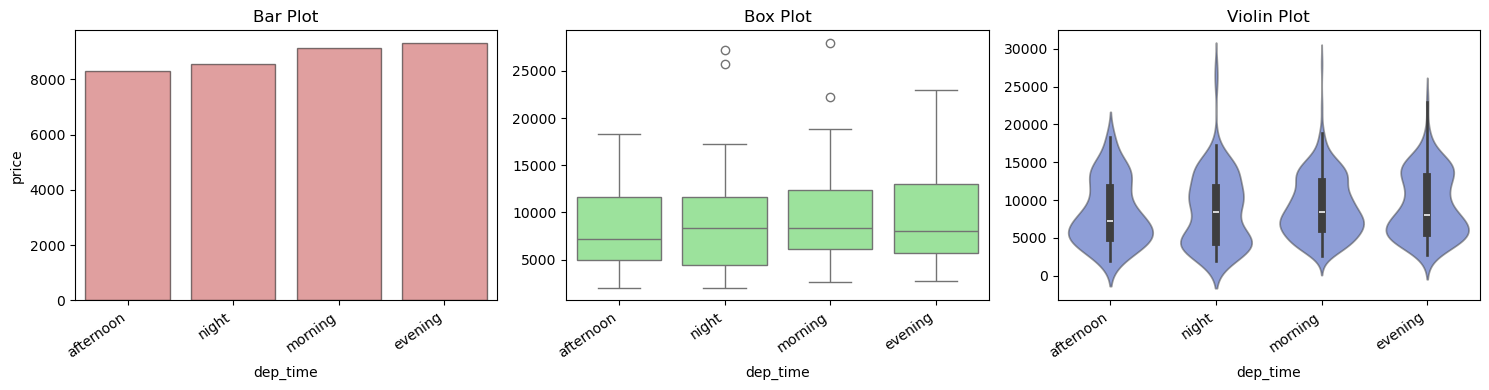

In [66]:
(
    train
    .assign(dep_time=lambda df_: (
        np.select([df_.dep_time.dt.hour.between(4,12,inclusive="left"),
                   df_.dep_time.dt.hour.between(12,16,inclusive="left"),
                   df_.dep_time.dt.hour.between(16,20,inclusive="left")],
                   ['morning','afternoon','evening'],
                   default='night')
    ))
    .pipe(eda_helper_functions.num_cat_bivar_plots,"price","dep_time")
)

#### Duration

In [67]:
train.duration

0       835
1       135
2       845
3       450
4      1480
       ... 
635     320
636     850
637     315
638     170
639     195
Name: duration, Length: 640, dtype: int64

In [68]:
eda_helper_functions.num_summary(train,'duration')

0       835
1       135
2       845
3       450
4      1480
       ... 
635     320
636     850
637     315
638     170
639     195
Name: duration, Length: 640, dtype: int64

Data Type      : int64
Missing Data   : 0 rows (0.00 %)
Available Data : 640 / 640 rows


,value
percentile,
0,80.00
5,90.00
10,150.00
25,175.00
50,520.00
75,926.25
90,1470.50
95,1590.25
99,1812.20


,value
mean,644.460938
trimmed mean (5%),612.265625
trimmed mean (10%),585.224609
median,520.000000


,value
var,254054.051680
std,504.037748
IQR,751.250000
mad,350.000000
coef_variance,0.782108


,value
skewness,0.893603
kurtosis,-0.028250


Significance Level   : 0.05
Null Hypothesis      : The data is normally distributed
Alternate Hypothesis : The data is not normally distributed
p-value              : 5.303020273649623e-21
Test Statistic       : 0.8894479422906699
- Since p-value is less than alpha (0.05), we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: We conclude that the data sample is not normally distributed


Significance Level   : 0.05
Null Hypothesis      : The data is normally distributed
Alternate Hypothesis : The data is not normally distributed
Critical Value       : 0.782
Test Statistic       : 22.91123355379159
- Since the Test-statistic is greater than Critical Value, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: We conclude that the data sample is not normally distributed


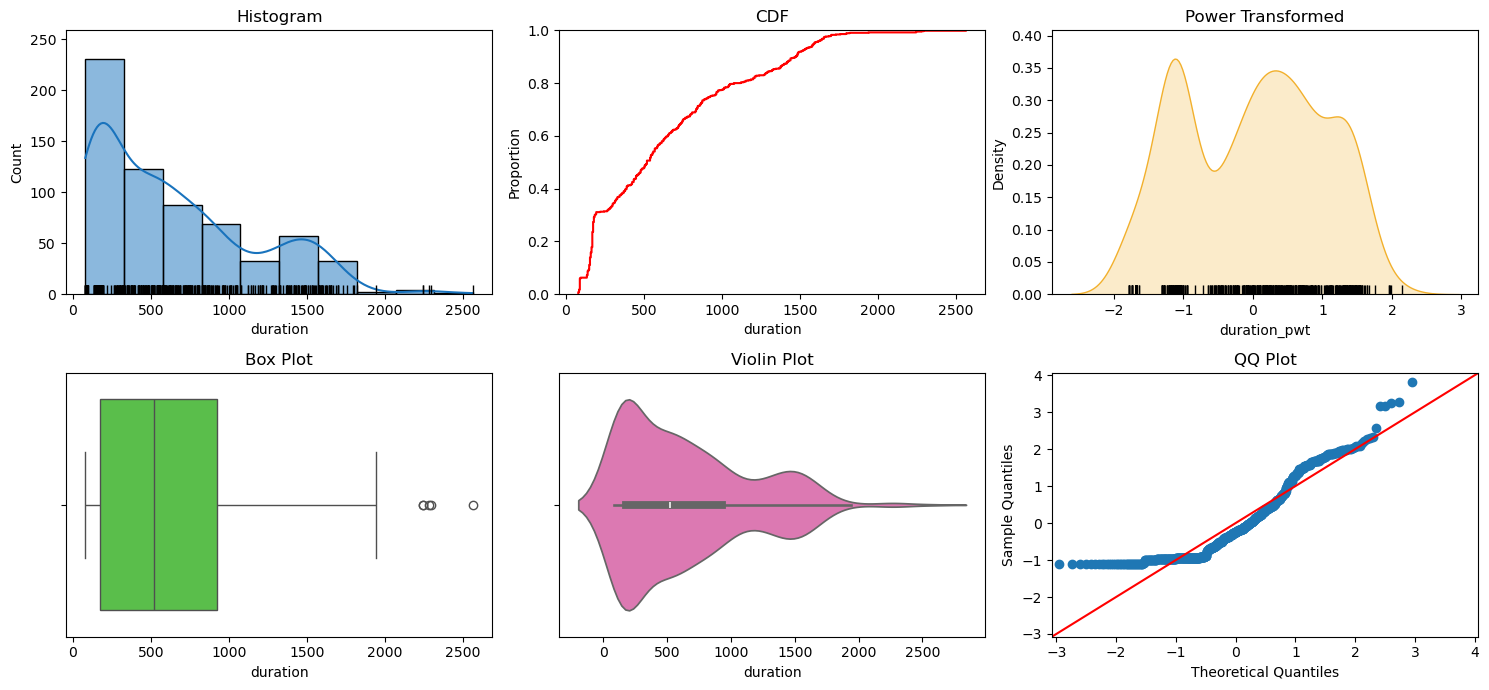

In [69]:
eda_helper_functions.num_univar_plots(train,'duration')

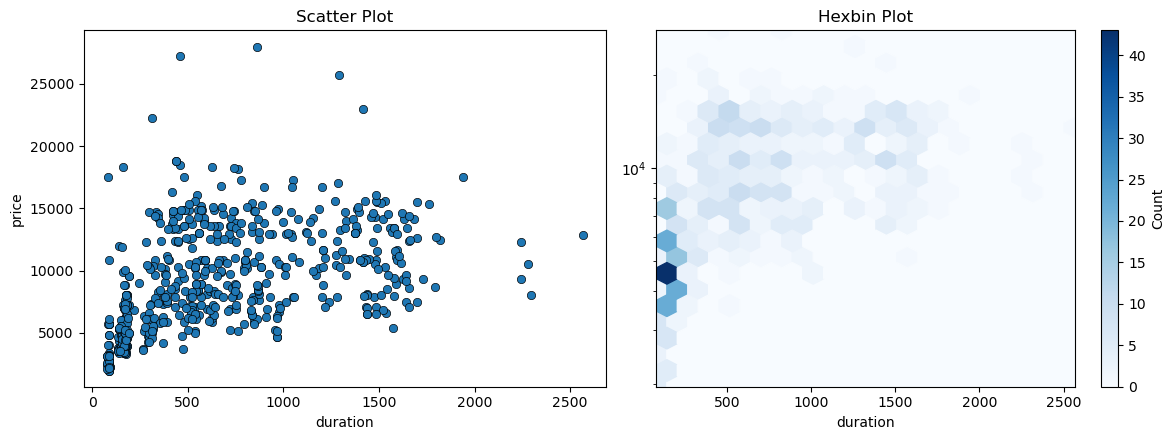

In [70]:
eda_helper_functions.num_bivar_plots(train,'duration','price',hexbin_kwargs=dict(yscale='log',gridsize=20,cmap="Blues"))

In [71]:
eda_helper_functions.num_num_hyp_testing(train,'price','duration')

- Significance Level   : 5.0%
- Null Hypothesis      : The samples are uncorrelated
- Alternate Hypothesis : The samples are correlated
- Test Statistic       : 0.5096104248492264
- p-value              : 1.3513216817715493e-43
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price and duration are correlated


- Significance Level   : 5.0%
- Null Hypothesis      : The samples are uncorrelated
- Alternate Hypothesis : The samples are correlated
- Test Statistic       : 0.6551142604683747
- p-value              : 1.0154793204486297e-79
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price and duration are correlated


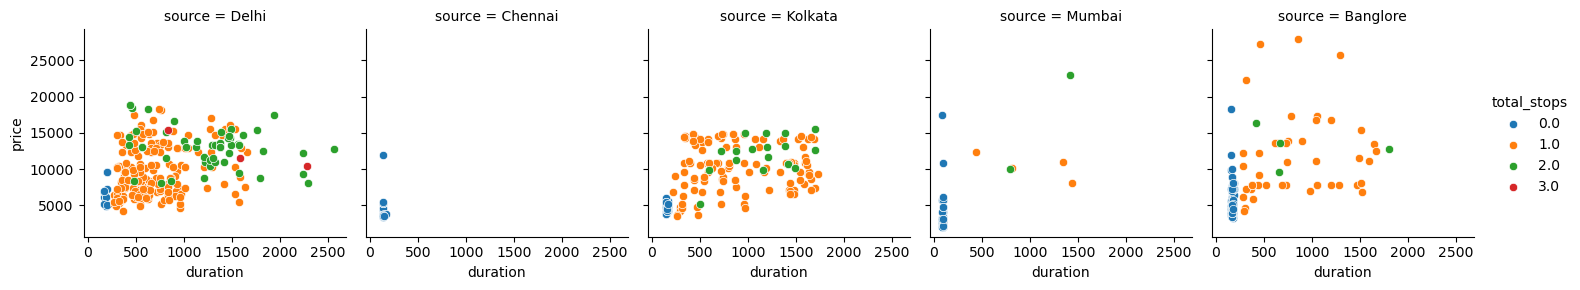

In [74]:
duration_grid=sns.FacetGrid(
    data=train,
    col='source',
    hue='total_stops',
    sharey=True
)
duration_grid.map(sns.scatterplot,'duration','price')
duration_grid.add_legend()

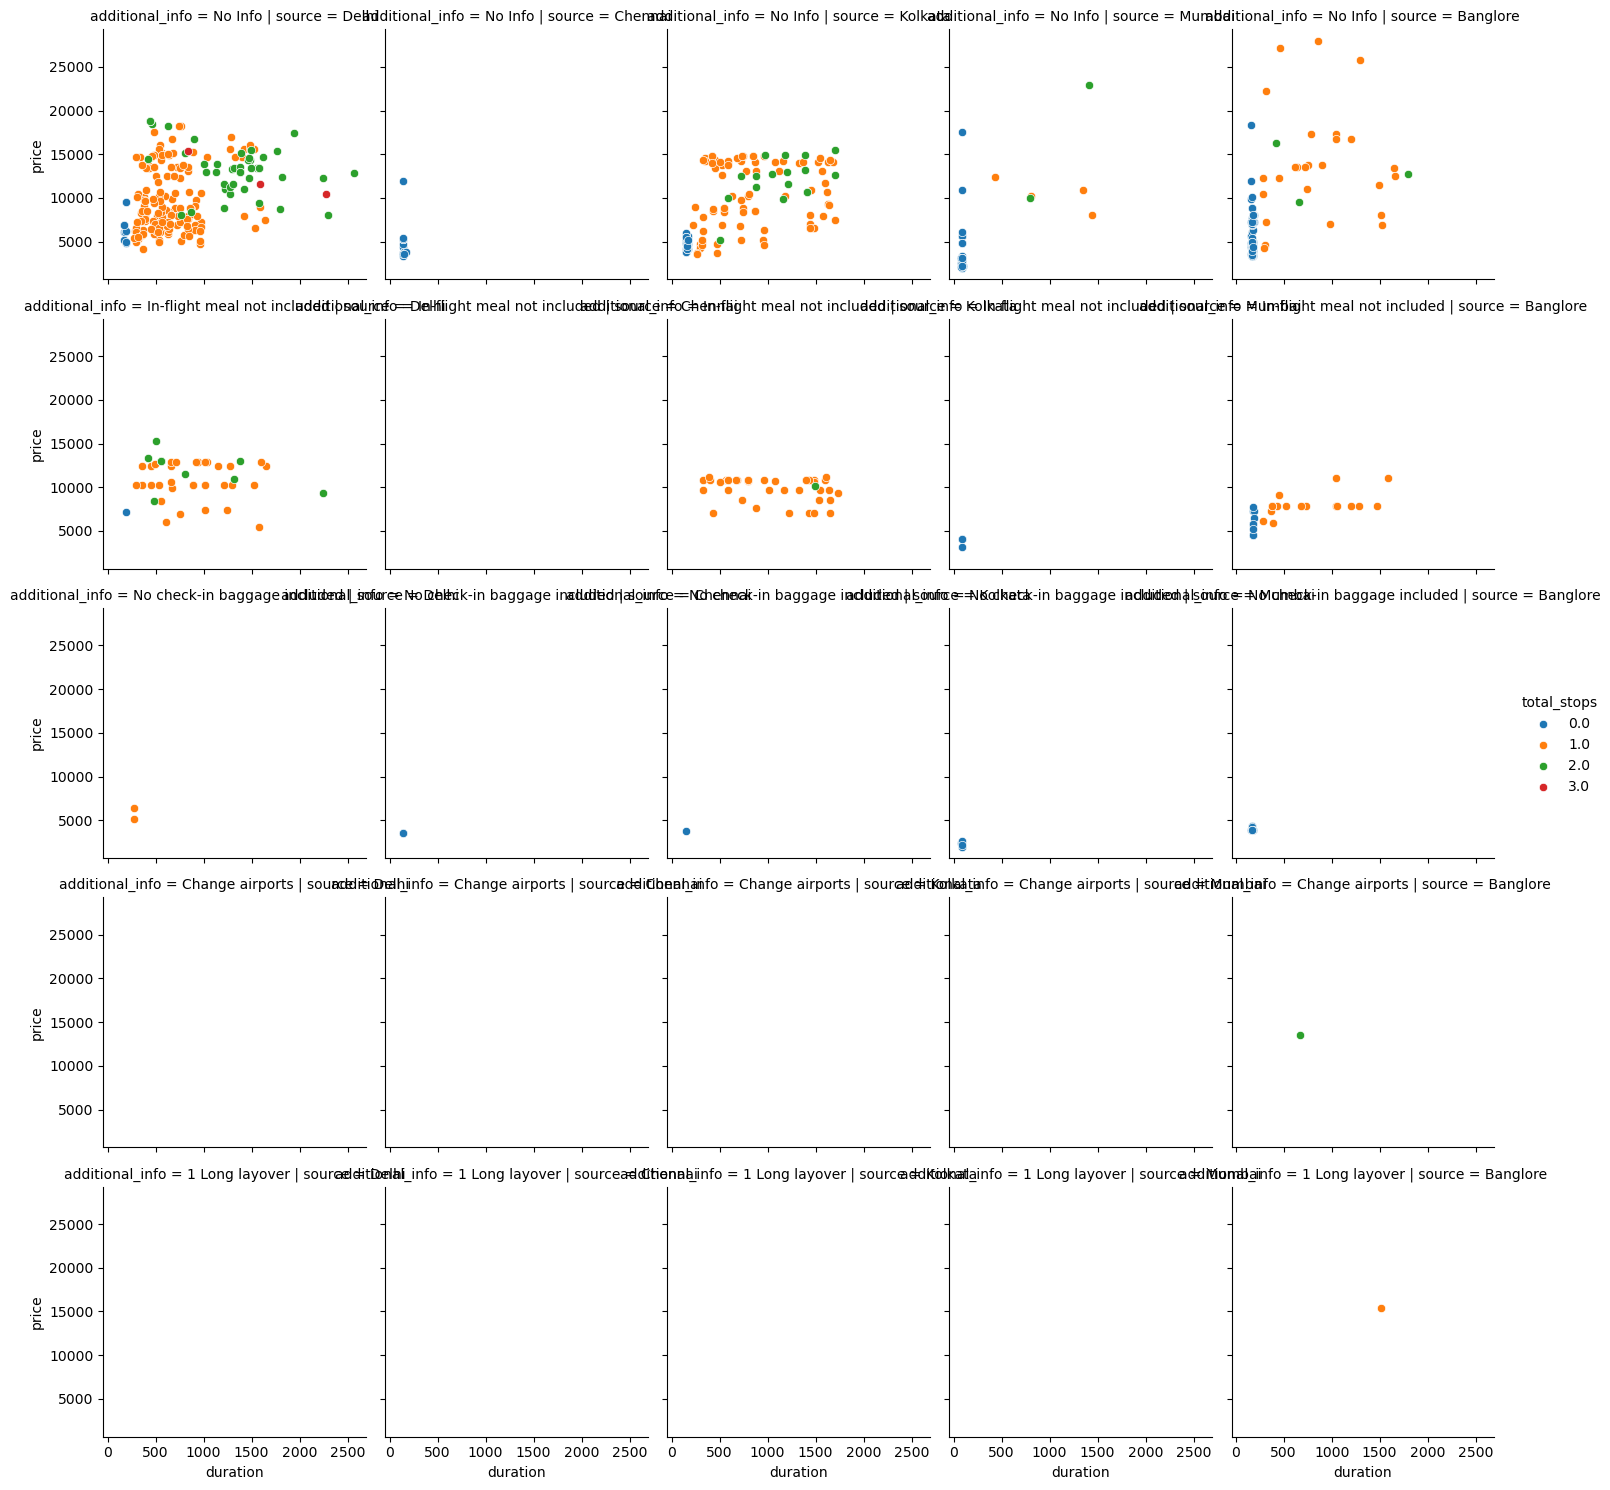

In [76]:
duration_grid=sns.FacetGrid(
    data=train,
    col='source',
    row='additional_info',
    hue='total_stops',
    sharey=True
)
duration_grid.map(sns.scatterplot,'duration','price')
duration_grid.add_legend()

In [77]:
eda_helper_functions.get_iqr_outliers(train,'duration')

Lower Limit : -951.875
Upper Limit : 2053.125


,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price
293,Jet Airways,2019-03-27,Delhi,Cochin,2024-07-06 06:20:00,2024-07-06 19:45:00,2245,2.0,In-flight meal not included,9296
544,Jet Airways,2019-03-27,Delhi,Cochin,2024-07-06 06:20:00,2024-07-06 19:45:00,2245,2.0,No Info,12273
612,Air India,2019-05-27,Delhi,Cochin,2024-07-06 05:15:00,2024-07-06 19:15:00,2280,3.0,No Info,10493
302,Air India,2019-03-27,Delhi,Cochin,2024-07-06 05:00:00,2024-07-06 19:15:00,2295,2.0,No Info,8026
423,Jet Airways,2019-03-21,Delhi,Cochin,2024-07-06 09:40:00,2024-07-06 04:25:00,2565,2.0,No Info,12819


#### Additional Info

In [79]:
eda_helper_functions.cat_summary(train,'additional_info')

0                          No Info
1                          No Info
2                          No Info
3      In-flight meal not included
4                          No Info
                  ...             
635                        No Info
636                        No Info
637                        No Info
638                        No Info
639                        No Info
Name: additional_info, Length: 640, dtype: object

Data Type      : object
Cardinality    : 5 categories
Missing Data   : 0 rows (0.00 %)
Available Data : 640 / 640 rows


,
count,640
unique,5
top,No Info
freq,505


,count,percentage
category,,
No Info,505,0.789062
In-flight meal not included,116,0.181250
No check-in baggage included,17,0.026562
Change airports,1,0.001563
1 Long layover,1,0.001563


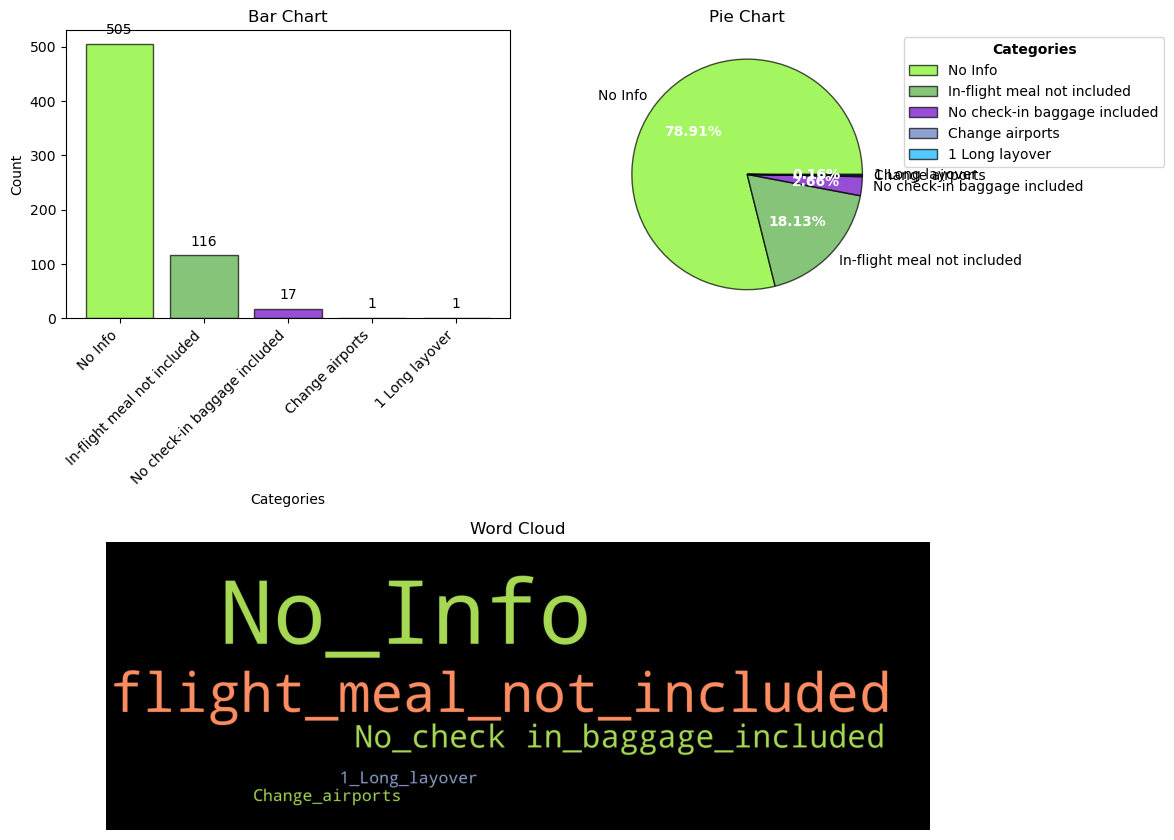

In [80]:
eda_helper_functions.cat_univar_plots(train,'additional_info')

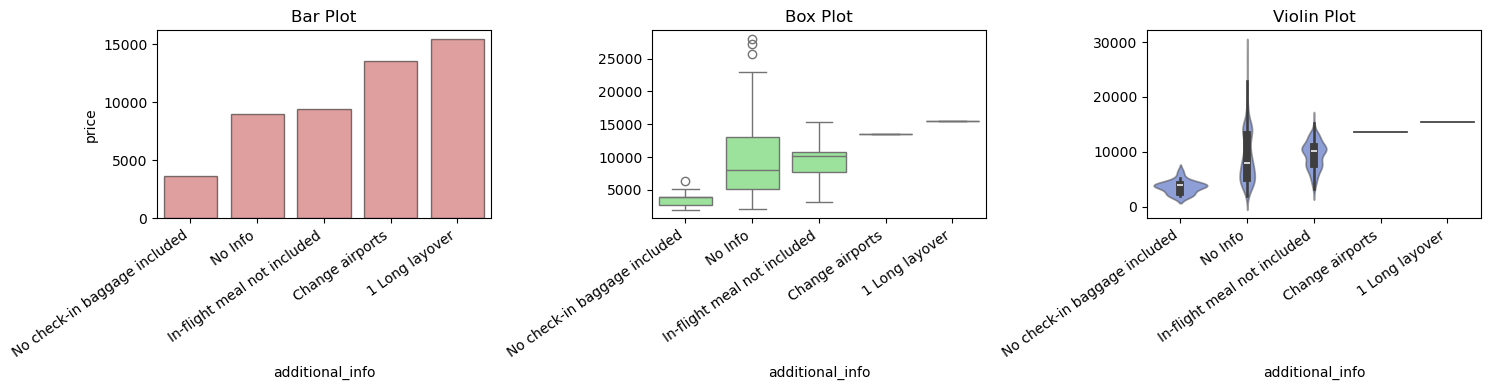

In [81]:
eda_helper_functions.num_cat_bivar_plots(train,'price','additional_info')

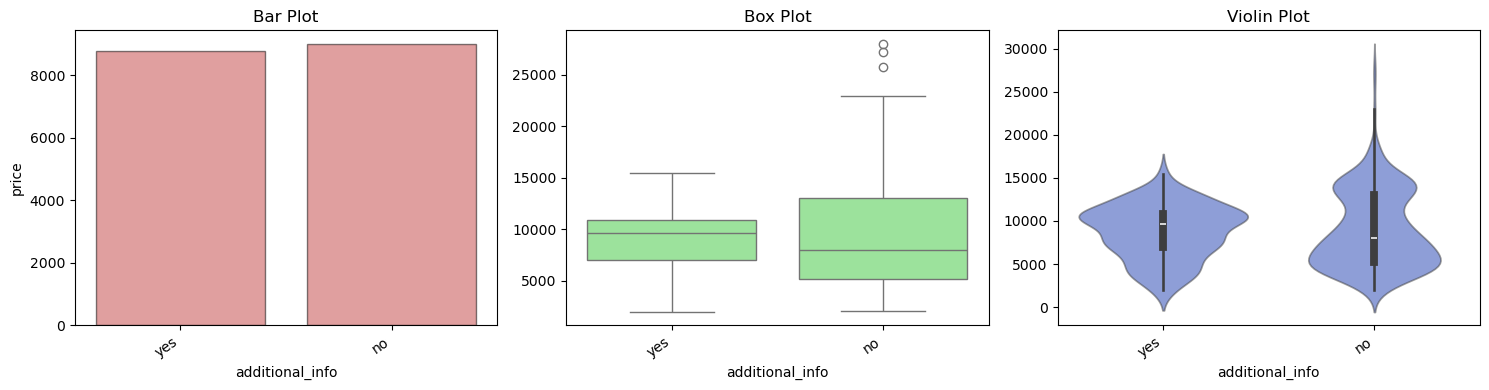

In [82]:
(
	train
	.assign(additional_info=(
		train
		.additional_info
		.pipe(lambda ser: np.where(ser.eq("No Info"), "no", "yes"))
	))
	.pipe(eda_helper_functions.num_cat_bivar_plots, "price", "additional_info")
)